### load data

In [1]:
# data used for training
import pickle as pkl
import numpy as np


data = pkl.loads(open('../data/de_800.data2.pkl', 'rb').read())
train_X = data['train_X']
train_Y = data['train_Y']
valid_X = data['valid_X']
valid_Y = data['valid_Y']
test_X  = data['test_X']
test_Y  = data['test_Y']

### test the model given by paper

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [2]:
import caffe
caffe.set_mode_gpu()

In [19]:
folder = '../model/caffe/'
model = caffe.Net(folder+'Red_CNN.prototxt',
                  folder+'Red_CNN.caffemodel',
                  caffe.TEST)


In [92]:
results_caffe = []
for i in range(20):
    model.blobs['data'].data[...] = test_X[i:i+1,:,:,:].transpose((0, 3, 1, 2))
    res = model.forward()
    print(res['eltwise2'].mean())
    results_caffe.append(copy.copy(res['eltwise2']))
results_caffe = np.concatenate(results_caffe, axis = 0)

0.35998604
0.32881075
0.3563008
0.333992
0.31217673
0.34653768
0.32225162
0.3312201
0.3617111
0.31214112
0.31739163
0.3385001
0.36404976
0.29859793
0.3752165
0.29378104
0.31942704
0.30165574
0.35168546
0.29817444


In [2]:
def mse(X, Y):
    return ((X - Y).reshape(-1)**2).mean()

In [103]:
mse(test_X, results_caffe)

0.089400016

In [3]:
def show_effect(X, denoise, Y, difference):
    f = plt.figure(figsize = (8,8))
    plt.imshow(np.vstack([np.hstack([X,denoise]),np.hstack([Y,difference])]),
               cmap = plt.cm.gray)
    plt.show()

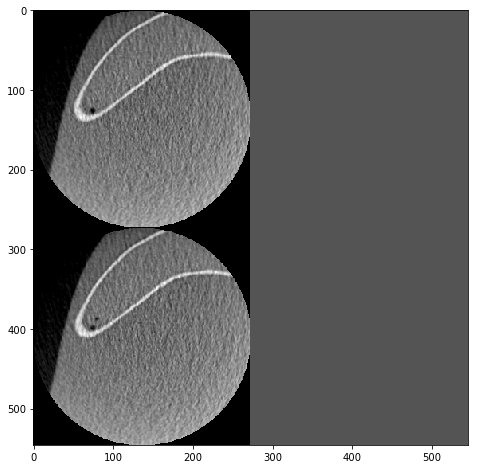

In [4]:
show_effect(test_X[0,:,:,0], test_Y[0,:,:,0], test_X[1,:,:,0], test_Y[1,:,:,0])

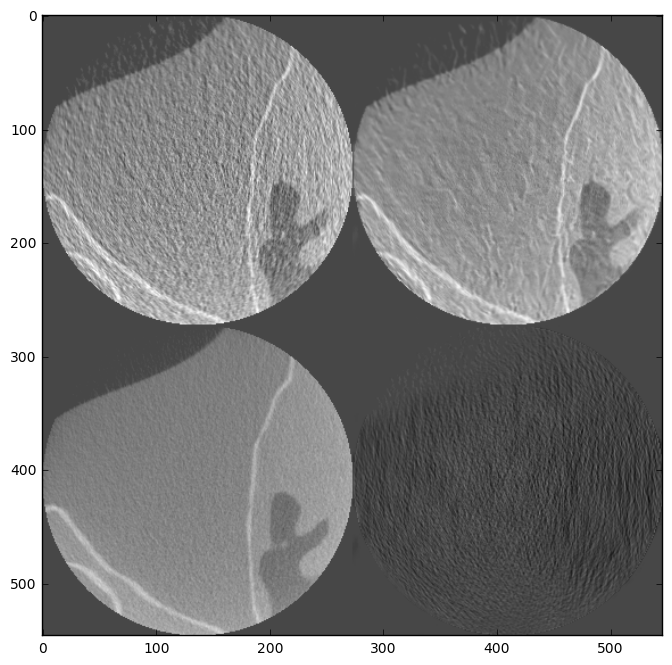

In [112]:
ID = 6
X = test_X[ID,:,:,0]
denoise = results_caffe1[ID,0,...]
Y = test_Y[ID,:,:,0]
difference = X - denoise

show_effect(X, denoise, Y, difference)


### test the trained model

In [4]:
import keras
from train_v010 import model_construction

ImportError: cannot import name 'ReLU'